In [130]:
import pandas as pd
import numpy as np

ssDF = pd.read_csv(
    "C:\\Users\\OZGUN\\Documents\\GitHub\\iuc-mak-pro-i\\output\\single_slope_dataframe.csv")
ssDF.head()

,ride_index,start_lat,start_lon,end_lat,end_lon,distance_covered,distance_since_start,elevation_change,elevation,time_since_start,time_elapsed,pct_of_total_ride,elevation_gain,elevation_lost,avg_velocity_kmh,slope_percentage,total_climb_since_start,all_time_avg_kmh,is_he_resting
0,1,40.181009,26.359442,40.184964,26.353516,783.85,0.00,15.5,6.8,0.0,221.0,2.12,15.4,0.0,12.77,2.0,0.0,9.41,False
1,1,40.184964,26.353516,40.191360,26.357408,771.79,783.85,-15.5,22.3,221.0,126.0,2.08,1.7,17.0,22.05,-2.0,1.7,9.41,False
2,1,40.191360,26.357408,40.193555,26.359788,242.77,1555.64,3.3,6.8,347.0,84.0,0.66,3.0,0.1,10.40,1.0,4.7,9.41,False
3,1,40.193555,26.359788,40.198779,26.358954,696.57,1798.41,-4.7,10.1,431.0,157.0,1.88,0.6,4.9,15.97,-1.0,5.3,9.41,False
4,1,40.198779,26.358954,40.201196,26.356685,332.53,2494.98,2.6,5.4,588.0,69.0,0.90,2.5,0.1,17.35,1.0,7.8,9.41,False


In [131]:
ssDF.drop(ssDF[ssDF.distance_covered < 3].index, inplace=True)
ssDF.drop(ssDF[ssDF.avg_velocity_kmh < 7].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage > 8].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage < -8].index, inplace=True)

In [132]:
ssDF = ssDF[['ride_index', 'slope_percentage','elevation_change','distance_since_start','total_climb_since_start','avg_velocity_kmh']]
ssDF.head()

,ride_index,slope_percentage,elevation_change,distance_since_start,total_climb_since_start,avg_velocity_kmh
0,1,2.0,15.5,0.00,0.0,12.77
1,1,-2.0,-15.5,783.85,1.7,22.05
2,1,1.0,3.3,1555.64,4.7,10.40
3,1,-1.0,-4.7,1798.41,5.3,15.97
4,1,1.0,2.6,2494.98,7.8,17.35


In [133]:
ssDF.reset_index(drop=True)
ssDF.head()

,ride_index,slope_percentage,elevation_change,distance_since_start,total_climb_since_start,avg_velocity_kmh
0,1,2.0,15.5,0.00,0.0,12.77
1,1,-2.0,-15.5,783.85,1.7,22.05
2,1,1.0,3.3,1555.64,4.7,10.40
3,1,-1.0,-4.7,1798.41,5.3,15.97
4,1,1.0,2.6,2494.98,7.8,17.35


In [134]:
from sklearn.model_selection import train_test_split

X_train = ssDF[ssDF.ride_index != 3]
X_train = X_train.drop("avg_velocity_kmh", axis=1)
X_train = X_train.drop("ride_index", axis=1)

X_test = ssDF[ssDF.ride_index == 3]
X_test = X_test.drop("avg_velocity_kmh", axis=1)
X_test = X_test.drop("ride_index", axis=1)

y_train = ssDF[ssDF.ride_index != 3]
y_train = y_train["avg_velocity_kmh"]

y_test = ssDF[ssDF.ride_index == 3]
y_test = y_test["avg_velocity_kmh"]

In [135]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-1.627048587655874

In [136]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.15691894480556057

In [137]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Feature Importance')

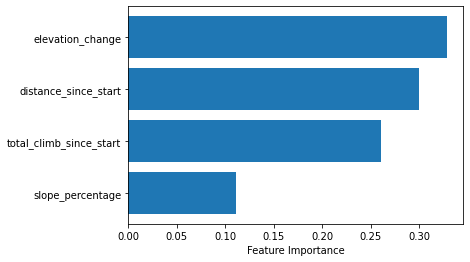

In [138]:
sort = model.feature_importances_.argsort()
plt.barh(X.columns[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")

Feature: 0, Score: 0.11084
Feature: 1, Score: 0.32911
Feature: 2, Score: 0.29959
Feature: 3, Score: 0.26045


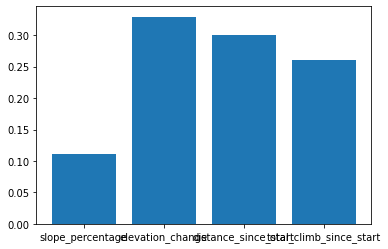

In [139]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar(X.columns, importance)
plt.show()

In [140]:
model.predict([[-2,300,5000,10]])

c:\Users\OZGUN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([12.2551])

In [141]:
import os
from gpx_file_reader import GPXFile
from visualization import *
from math_calculations import *
from dataframe_operations import *

gpxFile = GPXFile('Afternoon_Ride_2.gpx')
print(f"Analyzing: Afternoon_Ride_2.gpx")
gpxDF = gpxFile.get_gpx_dataframe()
gpxDF.head()

Analyzing: Afternoon_Ride_2.gpx


,lat,lon,ele,time
0,41.020713,28.638907,197.5,2021-09-16 14:14:06
1,41.020692,28.638872,197.6,2021-09-16 14:14:17
2,41.020692,28.638872,197.6,2021-09-16 14:14:17
3,41.020665,28.638870,197.6,2021-09-16 14:14:18
4,41.020646,28.638874,197.6,2021-09-16 14:14:21


In [142]:
gpxDF, grDF, ssDF = all_operations(gpxDF)
ssDF

c:\Users\OZGUN\Documents\GitHub\iuc-mak-pro-i\src\dataframe_operations.py:180: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\Users\OZGUN\Documents\GitHub\iuc-mak-pro-i\src\dataframe_operations.py:181: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,start_lat,start_lon,end_lat,end_lon,distance_covered,distance_since_start,elevation_change,elevation,time_since_start,time_elapsed,pct_of_total_ride,elevation_gain,elevation_lost,avg_velocity_kmh,slope_percentage,total_climb_since_start,all_time_avg_kmh,is_he_resting
0,41.020692,28.638872,41.020592,28.638894,26.95,0.00,0.0,197.6,0.0,24.0,0.07,0.2,0.2,4.04,0.0,0.0,5.03,False
1,41.020592,28.638894,41.020678,28.638874,16.77,26.95,0.0,197.6,24.0,12.0,0.04,0.1,0.1,5.03,0.0,0.1,5.03,False
2,41.020678,28.638874,41.020053,28.639165,262.98,43.73,0.2,197.6,36.0,184.0,0.68,2.9,2.7,5.15,1.0,3.0,5.03,False
3,41.020053,28.639165,41.017982,28.641084,298.96,306.70,-7.7,197.8,220.0,67.0,0.78,0.2,7.6,16.06,-3.0,3.2,5.03,False
4,41.017982,28.641084,41.015916,28.645180,480.22,605.67,-9.0,190.1,287.0,123.0,1.25,2.0,11.1,14.06,-2.0,5.2,5.03,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,41.020596,28.639054,41.020581,28.639060,20.14,38181.35,0.0,199.2,26679.0,11.0,0.05,0.1,0.1,6.59,0.0,476.5,5.03,False
75,41.020581,28.639060,41.020363,28.639094,35.82,38201.49,-0.5,199.2,26690.0,20.0,0.09,0.1,0.4,6.45,-1.0,476.6,5.03,False
76,41.020363,28.639094,41.020629,28.639058,37.46,38237.31,0.5,198.7,26710.0,35.0,0.10,0.3,0.1,3.85,1.0,476.9,5.03,False
77,41.020629,28.639058,41.020379,28.639083,53.73,38274.77,-0.5,199.2,26745.0,30.0,0.14,0.2,0.4,6.45,-1.0,477.1,5.03,False


In [143]:
ssDF.drop(ssDF[ssDF.distance_covered < 3].index, inplace=True)
ssDF.drop(ssDF[ssDF.avg_velocity_kmh < 7].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage > 8].index, inplace=True)
ssDF.drop(ssDF[ssDF.slope_percentage < -8].index, inplace=True)
ssDF_total_time = ssDF['time_elapsed'].sum()
ssDF_distance = ssDF['distance_covered']
ssDF = ssDF[['slope_percentage','elevation_change','distance_since_start','total_climb_since_start','avg_velocity_kmh']]
ssDF

,slope_percentage,elevation_change,distance_since_start,total_climb_since_start,avg_velocity_kmh
3,-3.0,-7.7,306.70,3.2,16.06
4,-2.0,-9.0,605.67,5.2,14.06
5,4.0,7.4,1085.89,12.5,10.52
6,-2.0,-10.3,1293.40,12.6,11.17
7,1.0,0.9,1761.94,13.5,12.67
8,-3.0,-28.3,1871.06,20.7,12.90
10,3.0,23.7,3630.03,63.0,7.04
11,-4.0,-37.9,4322.67,81.9,9.93
13,-1.0,-7.9,5582.77,88.5,16.17
14,0.0,0.0,6575.12,88.6,19.16


In [144]:
X_sirkeci = ssDF[['slope_percentage','elevation_change','distance_since_start','total_climb_since_start']]
model.predict(X_sirkeci)

array([14.9735, 14.4309, 10.8985, 14.0318, 13.1413, 13.9734,  7.8814,
       11.4071, 14.9025, 18.4504, 11.2538, 11.9775, 16.7934, 14.7455,
       11.2011, 14.2222, 16.9463, 13.5484, 17.4939, 10.805 , 19.8044,
       19.4826, 17.2359, 19.7865, 18.6473, 18.141 , 20.1681, 13.8824,
       11.0698, 14.9612, 12.3269, 13.1117, 12.7653, 12.4792, 15.5667,
       12.7213, 12.2579, 10.9016, 13.6797,  9.6209, 12.853 , 13.6983,
        8.7482, 11.8028, 13.6274, 10.9945, 16.6653,  9.7202, 15.35  ,
        9.5781, 19.6781, 12.7973, 14.0033, 11.4516, 10.9069])

In [145]:
velocities = model.predict(X_sirkeci)

In [146]:
X_sirkeci['velocity'] = velocities

In [147]:
predicted_df = X_sirkeci
predicted_df

,slope_percentage,elevation_change,distance_since_start,total_climb_since_start,velocity
3,-3.0,-7.7,306.70,3.2,14.9735
4,-2.0,-9.0,605.67,5.2,14.4309
5,4.0,7.4,1085.89,12.5,10.8985
6,-2.0,-10.3,1293.40,12.6,14.0318
7,1.0,0.9,1761.94,13.5,13.1413
8,-3.0,-28.3,1871.06,20.7,13.9734
10,3.0,23.7,3630.03,63.0,7.8814
11,-4.0,-37.9,4322.67,81.9,11.4071
13,-1.0,-7.9,5582.77,88.5,14.9025
14,0.0,0.0,6575.12,88.6,18.4504


In [148]:
predicted_df['distance_covered'] = ssDF_distance

In [149]:
predicted_df['time_elapsed'] = predicted_df.apply(lambda x: (x['distance_covered']/1000) / x['velocity'], axis=1)
predicted_df


,slope_percentage,elevation_change,distance_since_start,total_climb_since_start,velocity,distance_covered,time_elapsed
3,-3.0,-7.7,306.70,3.2,14.9735,298.96,0.019966
4,-2.0,-9.0,605.67,5.2,14.4309,480.22,0.033277
5,4.0,7.4,1085.89,12.5,10.8985,207.51,0.019040
6,-2.0,-10.3,1293.40,12.6,14.0318,468.54,0.033391
7,1.0,0.9,1761.94,13.5,13.1413,109.12,0.008304
8,-3.0,-28.3,1871.06,20.7,13.9734,1017.87,0.072843
10,3.0,23.7,3630.03,63.0,7.8814,692.63,0.087882
11,-4.0,-37.9,4322.67,81.9,11.4071,1012.31,0.088744
13,-1.0,-7.9,5582.77,88.5,14.9025,992.36,0.066590
14,0.0,0.0,6575.12,88.6,18.4504,10.65,0.000577


In [150]:
predicted_df['time_elapsed'].sum()

2.641025689645745

In [153]:
ssDF_total_time/60/60

2.82

In [151]:
# 1 saatte bitirilir